In [6]:
import sys
sys.path.append('/tigress/kendrab/python_pkgs')
import numpy as np
from numpy.random import rand
import pyvpic
from dataframework.src.datasets.vpicdataset import VPICDataset

In [8]:
files = ['/scratch/gpfs/kendrab/dataset_vpic_runs/perturbed/27012023/output30/data.h5','nope']
kwargs = {'get_vars' : ['all']}
data_full = VPICDataset(vpicfiles=files, **kwargs)


NO PARAMS ADDED, FUNCTIONALIITY NOT ADDED YET!!!! SORRY
Added n Variable
Added pxx Variable
Added pxy Variable
Added pyy Variable
Added pyz Variable
Added pzx Variable
Added pzz Variable
Added vx Variable
Added vy Variable
Added vz Variable
Added bx Variable
Added by Variable
Added bz Variable
Added ex Variable
Added ey Variable
Added ez Variable
Added jx Variable
Added jy Variable
Added jz Variable
Added rhob Variable
Added rhof Variable
Added n Variable
Added pxx Variable
Added pxy Variable
Added pyy Variable
Added pyz Variable
Added pzx Variable
Added pzz Variable
Added vx Variable
Added vy Variable
Added vz Variable


In [9]:
time_idx = 0
desired_time = data_full.timeseries[time_idx]
print(data_full.variables['bx'].data.shape)
print(data_full.timeseries.shape)
print(data_full.timeseries)


(16, 4968, 1240)
(16,)
[2.4972048e-03 9.9888194e-01 1.9977639e+00 2.9966459e+00 3.9955277e+00
 4.9944096e+00 5.9932919e+00 6.9921737e+00 7.9910555e+00 8.9899378e+00
 9.9888191e+00 1.0987701e+01 1.1986584e+01 1.2985465e+01 1.3984347e+01
 1.4983230e+01]


In [10]:
#fix that the time dimension doesn't exist for some gd reason
if len(data_full.variables['bx'].data.shape) < 3:
    for variable in data_full.variables.values():
        notime_shape = variable.data.shape
        variable.data = variable.data.reshape((1, *notime_shape))
data_full.calc_fluxfn(b1_name='bz', b2_name='bx')

Added flux_fn Variable


In [11]:
# Zoom in on the good stuff
data_closer = data_full.ndslice(zooms = [[-np.inf,np.inf], [-20, 20]])

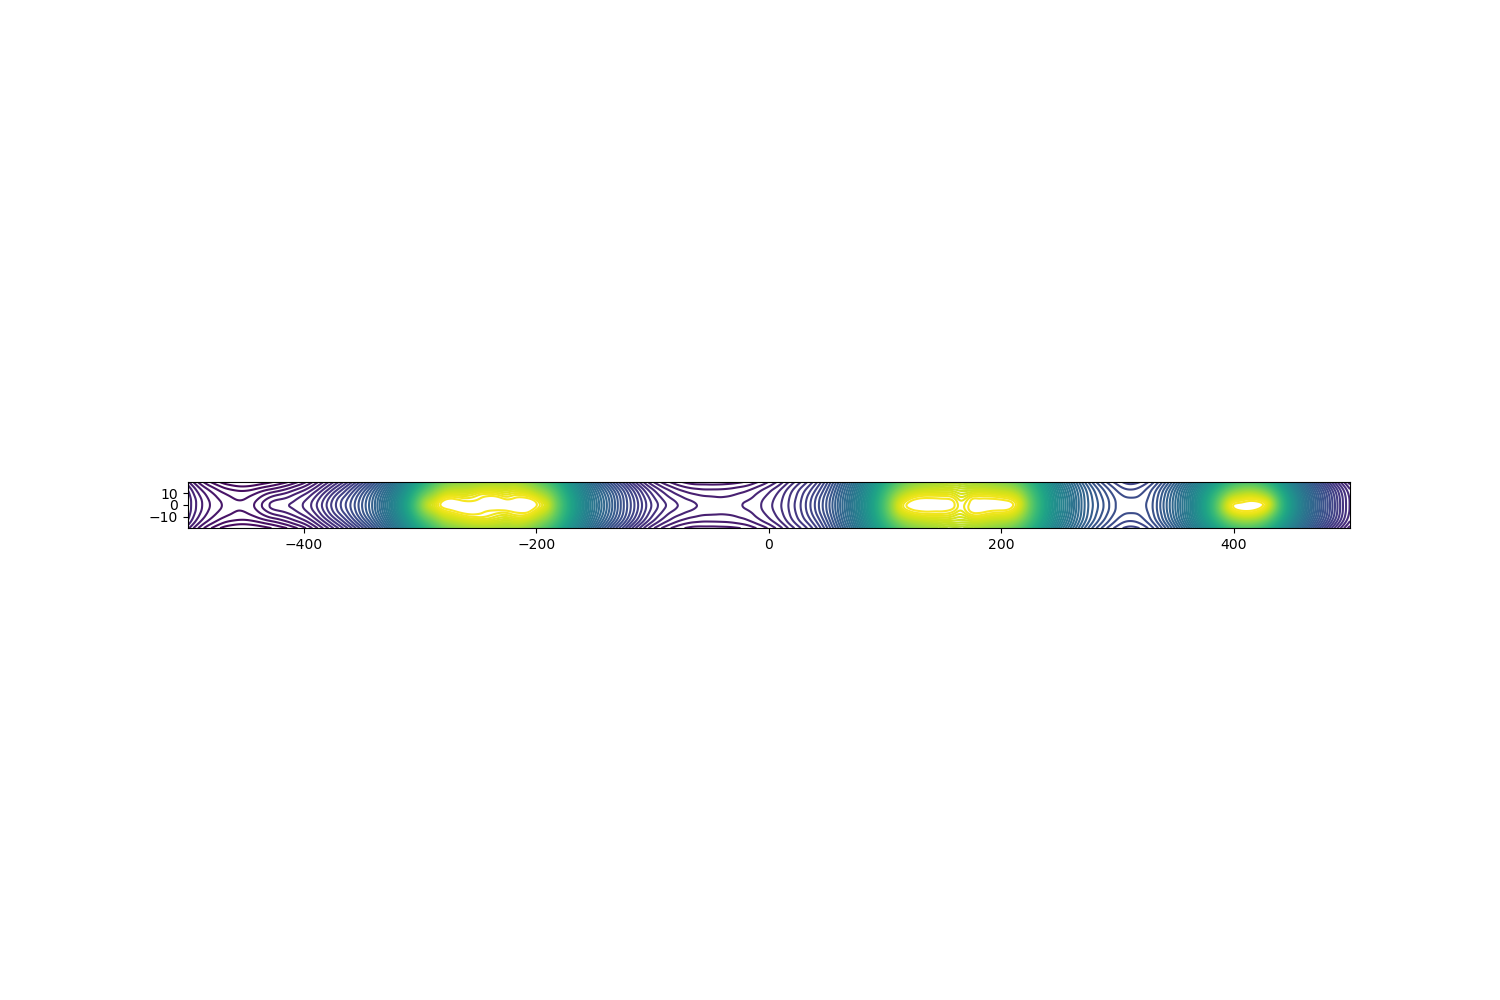

In [15]:
%matplotlib widget
import matplotlib.pyplot as plt

X,Y = np.meshgrid(*data_closer.variables['bx'].mesh, indexing='ij')
fig, ax = plt.subplots(figsize=(15,10))
ctr =ax.contour(X,Y,data_closer.variables['flux_fn'].data[14], levels=100)
ax.set_aspect("equal")

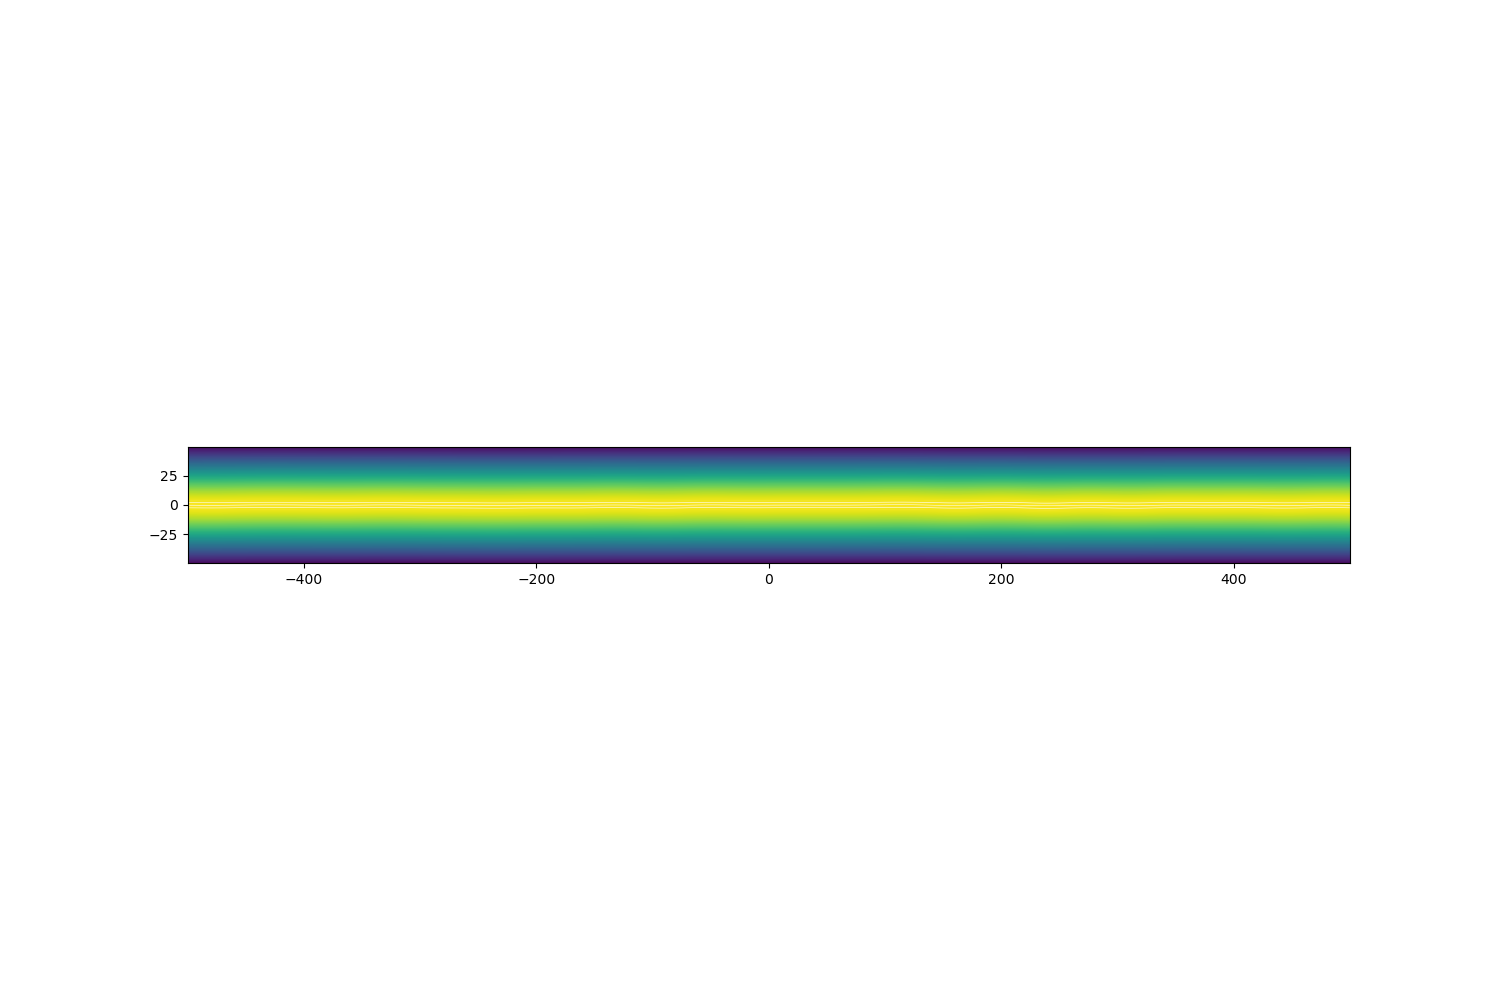

In [8]:
from ipywidgets import Button
Button(description='test')

Button(description='test', style=ButtonStyle())